<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_CV6_OD_PRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [ ]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

In [ ]:
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

In [ ]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
# sample_training_images, _ = next(val_data_gen)
# plotImages(sample_training_images[:5])

In [ ]:
# _[:5] # 정답 데이터
# sample_training_images.shape

VGG16 모델의 구조를 다시 상기해 보고, 위의 코드를 참고하여 VGG16 모델을 직접 구현해 보세요.

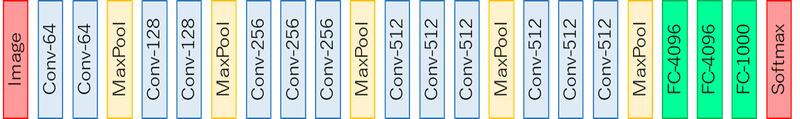

In [ ]:
# input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
# x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
# x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)

# x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)

# x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)


# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)

# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)

# x=tf.keras.layers.Flatten()(x)
# x=tf.keras.layers.Dense(4096, activation='relu')(x)
# x=tf.keras.layers.Dense(4096, activation='relu')(x)
# x=tf.keras.layers.Dense(1000, activation='relu')(x)
# out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
# model.summary()

In [ ]:
# loss_function=tf.keras.losses.binary_crossentropy
# optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
# metric=tf.keras.metrics.binary_accuracy
# model.compile(loss=loss_function,
#               optimizer=optimize,
#               metrics=[metric])

# # callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# # callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [ ]:
# history = model.fit(
#       train_data_gen,
#       steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
#       epochs=epochs,
#       validation_data=val_data_gen,
#       # callbacks=callbacks_list,
#       validation_freq=1)

In [ ]:
# acc = history.history['binary_accuracy']
# val_acc = history.history['val_binary_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(len(acc))

# plt.plot(epochs_range, acc, 'bo', label='Training acc')
# plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs_range, loss, 'bo', label='Training loss')
# plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [ ]:
# parameter Initialization
batch_size = 32  # batch size를 늘려보기
epochs = 10  # epochs를 늘려보기
IMG_HEIGHT = 256
IMG_WIDTH = 256

# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=15,  # rotation 범위 늘리기
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,  # shear_range 추가
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')  # fill_mode 추가

# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

input_layer = tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = tf.keras.layers.Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# 더 많은 Conv2D 및 MaxPool2D 레이어 추가

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)  # Dense 레이어 수정
x = tf.keras.layers.BatchNormalization()(x)
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss_function = tf.keras.losses.binary_crossentropy
optimize = tf.keras.optimizers.Adam(learning_rate=0.001)  # learning_rate 변경
metric = tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks 추가
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)
]


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 batch_normalization_2 (Bat  (None, 256, 256, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0   

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen),
    callbacks=callbacks_list
)

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 1.1639 - binary_accuracy: 0.5440